# Notebook, um die _explorative factor analysis_ (EFA) zu demonstrieren sowie ein Scoring

#### Kurze Erläuterungne zu den Ergebnissen: 
EFA:
- Eine EFA ist grds. durchführbar (Bartlett und KMO sind innerhalb der erforderlichen Parameter)
- Die Faktorladungen zeigen distinkte Bereiche 
- Die Faktorscores können in standardisierter Form an die PIs zur Potentialidentifikation zurückgeschrieben werden, was das Scoring in vier Bereichen/Quadranten ermöglicht

---
## EFA

Im Folgenden wird nach dem allg. Standardprozess eine _Explorative Factor Analysis_ (EFA) durchgeführt. Dazu wird die Python-Bibliothek "FactorAnalyzer" genutzt. 

### Quellen

Die wesentlichen Quellen zu diesem Vorgehen und der Auswertung sind: 
- [DataCamp Tutorial für eine EFA in Python](https://www.datacamp.com/tutorial/introduction-factor-analysis)
- [Tutorial der FU Berlin](https://www.geo.fu-berlin.de/en/v/soga-py/Advanced-statistics/Multivariate-Approaches/Factor-Analysis/A-Simple-Example-of-Factor-Analysis-in-Python/index.html)
- Die Monographie von: Pascal Jordan. (2019). Faktorenanalyse (1. Auflage, 2019). Edition Rainer Hampp. https://www.wiso-net.de/document/EBOK,AEBO__9783957103437175
- Stellen, die mit KI bearbeitet wurden, sind mit **[KI]** markiert.


In [22]:
# Import der Standardmodule für eine EFA mit Python 

from pathlib import Path 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.preprocessing import StandardScaler

# Warnungen unterdrücken 
import warnings 
warnings.filterwarnings("ignore")

# Pfade relativ definieren 
curr_folder = Path.cwd()

# Input-Pfad und -Datei
input_folder = curr_folder.parent / r"01_data\01_csv_data\00_pi_basics"

pi_file = input_folder / r"FINALLY_ALL_pi_data.csv"

# Output-Pfad
out_dir = curr_folder.parent / r"01_data\04_efa"

# DataFrame einlesen
df = pd.read_csv(pi_file, sep=",", encoding="utf-8")

df_numeric = df[["h_index", "publikationen_gesamt", "drittmittel_gesamt", "s2_citations", "drittmittel_volumen"]]

In [23]:
# Die numerischen Werte werden standardisiert mit dem Z-Score aus der scikit-learn Bibliothek

# Anzeigeoptionen für die Ausgaben einstellen 
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 20)
pd.set_option("display.width", 150)

# StandardScaler initialisieren und anwenden
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_numeric)

df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

# Behandlung der leeren Werte (falls vorhanden)
df_scaled = df_scaled.fillna(0)

# Speichern der skalierten Daten als CSV-Datei
scaled_file = out_dir / r"efa_pi_data_scaled.csv"
df_scaled.to_csv(scaled_file, sep=";", index=False, encoding="utf-8")

print("Erste Übersicht der skalierten Daten:\n\n {}".format(df_scaled))
print(80*"==", "\n")

Erste Übersicht der skalierten Daten:

      h_index  publikationen_gesamt  drittmittel_gesamt  s2_citations  drittmittel_volumen
0  -0.657379             -0.371369           -0.501848     -0.654957             0.229065
1  -0.597863             -0.458808           -0.207431     -0.604558             0.133097
2   0.711484              1.115099            2.147911      0.239164             2.460304
3  -0.538347             -0.633686           -0.011152     -0.512849             0.373016
4  -0.240768             -0.305789           -1.188823     -0.197403            -1.210444
5   0.056811              0.120477            1.264658     -0.277545             0.708901
6   0.235358              0.022108           -0.403709      0.313193             0.468983
7   1.425674              1.344628            2.147911      1.142043             1.908492
8  -0.538347             -0.655546           -0.599988     -0.585390            -0.178796
9   0.949547              0.360935           -0.207431      

In [24]:
# Ausführung der Tets zur Entscheidung über die Validität der EFA 

# Bartlett-Test. Hier wird grds. ein Wert von < 0,05 erwartet 
_, p_value = calculate_bartlett_sphericity(df_scaled)
print(f"Bartlett-Ergebnis für den P-Wert: {float(p_value):.40f}")

# KMO-Test: Hier wird grds. ein Wert von über 0,6 erwartet 
kmo_all, kmo_model = calculate_kmo(df_scaled)
print(f"KMO Wert liegt bei: {float(kmo_model):.2f}")

Bartlett-Ergebnis für den P-Wert: 0.0000000000000000000000000000000000000220
KMO Wert liegt bei: 0.76


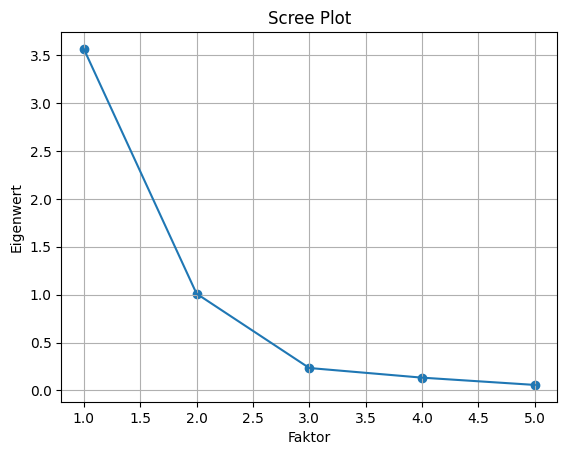

In [25]:
# Initialisiere Analyzer für einen Scree Plot zur Entscheidung über die Anzahl der Faktoren
fa = FactorAnalyzer(rotation=None)
fa.fit(df_scaled)

# Eigenwerte extrahieren
ev, v = fa.get_eigenvalues()

# Scree Plot erstellen, um Ellenbogenkante zu finden [KI]
plt.scatter(range(1, df_scaled.shape[1]+1), ev)
plt.plot(range(1, df_scaled.shape[1]+1), ev)
plt.title("Scree Plot")
plt.xlabel("Faktor")
plt.ylabel("Eigenwert")
plt.grid()
plt.show()

Es zeigt sich, dass idealerweise zwei Faktoren angenommen werden sollten!

In [26]:
# Faktoren anhand des Graphen auswählen und Ladungen anzeigen lassen 

fa = FactorAnalyzer(n_factors=2, rotation="promax", method="ml")

fa.fit(df_scaled)

# Ladungen anzeigen
loadings_df = pd.DataFrame(fa.loadings_, index=df_scaled.columns)
loadings_df.to_csv(out_dir / "efa_factor_loadings.csv", sep=";", encoding="utf-8")
print(loadings_df, "\n\n")

                             0         1
h_index               0.951906  0.061492
publikationen_gesamt  0.935492 -0.085319
drittmittel_gesamt    0.292442  0.810036
s2_citations          0.941379  0.007246
drittmittel_volumen  -0.117966  0.767967 




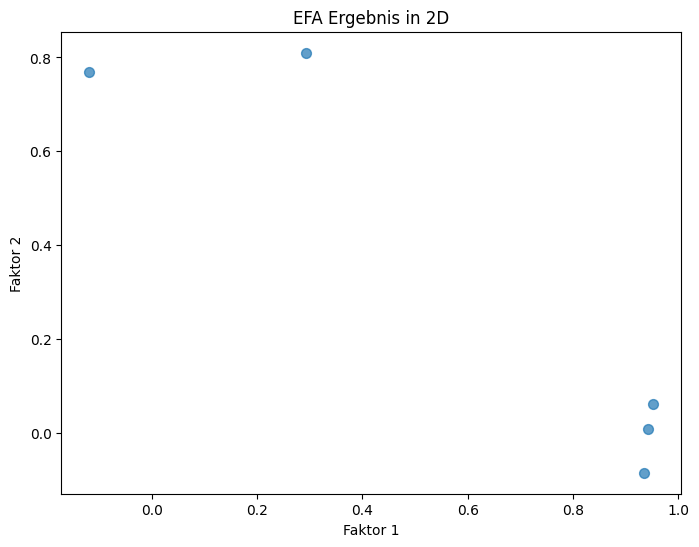

In [27]:
# Visualisierung der Faktorenladungen

# Scatterplot 
plt.figure(figsize=(8,6))
plt.scatter(loadings_df.iloc[:,0], loadings_df.iloc[:,1], 
            cmap="viridis", s=50, alpha=0.7)

plt.xlabel("Faktor 1")
plt.ylabel("Faktor 2")
plt.title("EFA Ergebnis in 2D")
plt.savefig(out_dir / "efa_factor_loadings_plot.png")
plt.show()

## Zwischenfazit der EFA

Letztlich zeigt sich, dass nach der EFA eine Faktormenge mit n=2 fast die gesamte Varianz der Features erklärt! Die fünf numerischen Features teilen sich, wie durchaus auch zu erwarten war, in zwei Bereiche, die mit den Publikationen und Drittmitteln korrespondieren.

In [28]:
# Als nächstes werden die Ergebnisse der EFA in den ursprünglichen Datensatz integriert 
# und als CSV-Datei gespeichert.

df1 = df.copy()

# Zwei neue Spalten für die Faktoren erstellen
df1["EFA_Faktor_Pubs"] = fa.transform(df_scaled)[:, 0]
df1["EFA_Faktor_TPF"] = fa.transform(df_scaled)[:, 1]

# Pfade definieren und Datei speichern
efa_output_file = out_dir / r"efa_pi_data_with_factors.csv"

df1.to_csv(efa_output_file, sep=";", index=False, encoding="utf-8")

# Check
print("Erste Übersicht der Daten mit EFA Faktoren:\n\n {}".format(df1[["pi_name_hashed", "EFA_Faktor_Pubs", "EFA_Faktor_TPF"]]))
print(80*"==", "\n")


Erste Übersicht der Daten mit EFA Faktoren:

    pi_name_hashed  EFA_Faktor_Pubs  EFA_Faktor_TPF
0           30BPQ        -0.642515       -0.382820
1           nKxeh        -0.596178       -0.043402
2           5Tu5C         0.637539        2.405035
3           sPQN4        -0.557174        0.184297
4           +w0gG        -0.225399       -1.373684
5           XTXqt        -0.007053        1.540363
6           Tm1F5         0.221935       -0.558389
7           YQdO6         1.357380        2.150965
8           oAWW9        -0.565448       -0.531154
9           Nx/ca         0.788392       -0.528461
10          EtGNI         2.191268        2.454963
11          RI2M5         1.332093        1.555951
12          VCK7S        -0.602650        0.563390
13          3uQdV         0.487771       -0.049442
14          bb6hC         0.492268        0.290284
15          Lt4od         1.111909       -0.162170
16          ReZBo         0.020717        0.115223
17          TqX2v         0.200443  

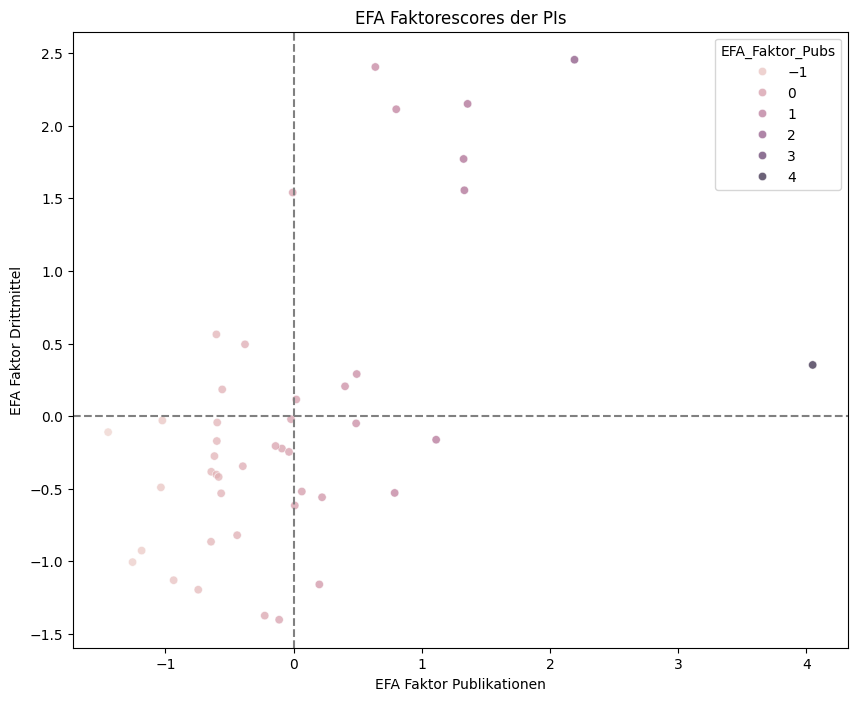

In [29]:
# Die Faktorescores werden ausgewertet und gespeichert

# 2D Scatterplot der beiden Faktoren [KI]
plt.figure(figsize=(10,8))
sns.scatterplot(data=df1, x=df1["EFA_Faktor_Pubs"], y=df1["EFA_Faktor_TPF"], 
            hue=df1["EFA_Faktor_Pubs"], alpha=0.7)
plt.axvline(0, color="grey", linestyle="--")
plt.axhline(0, color="grey", linestyle="--")
plt.xlabel("EFA Faktor Publikationen")
plt.ylabel("EFA Faktor Drittmittel")
plt.title("EFA Faktorescores der PIs")
# plt.grid()
plt.savefig(out_dir / "efa_factor_scores_plot.png")
plt.show()

In [30]:
# Top 5 PIs nach Faktor 1
top_5_pubs = df1.nlargest(3, "EFA_Faktor_Pubs")[["pi_name_hashed", "EFA_Faktor_Pubs", "EFA_Faktor_TPF"]]
print("Top 3git  PIs nach Faktor 1:\n", top_5_pubs)
print(80*"=")

# Top 5 PIs nach Faktor 2
top_5_tpf = df1.nlargest(3, "EFA_Faktor_TPF")[["pi_name_hashed", "EFA_Faktor_Pubs", "EFA_Faktor_TPF"]]
print("Top 3 PIs nach Faktor 2:\n", top_5_tpf)
print(80*"=")

# Potentialidentifikation 
low_5_pubs = df1.nsmallest(3, "EFA_Faktor_Pubs")[["pi_name_hashed", "EFA_Faktor_Pubs", "EFA_Faktor_TPF"]]
print("Bottom 3 PIs nach Faktor 1:\n", low_5_pubs)
print(80*"=")

low_5_tpf = df1.nsmallest(3, "EFA_Faktor_TPF")[["pi_name_hashed", "EFA_Faktor_Pubs", "EFA_Faktor_TPF"]]
print("Bottom 3 PIs nach Faktor 2:\n", low_5_tpf)
print(80*"=")

# Speichern der Ergebnisse
factors_summary_file = out_dir / r"efa_top_bottom_factors_summary.csv"

factor_summaries = pd.concat([top_5_pubs, top_5_tpf, low_5_pubs, low_5_tpf], axis=0)
print(factor_summaries)

# Speichern der Ergebnisse 
factor_summaries.to_csv(factors_summary_file, index=False)

Top 3git  PIs nach Faktor 1:
    pi_name_hashed  EFA_Faktor_Pubs  EFA_Faktor_TPF
41          aEfGQ         4.049573        0.353055
10          EtGNI         2.191268        2.454963
7           YQdO6         1.357380        2.150965
Top 3 PIs nach Faktor 2:
    pi_name_hashed  EFA_Faktor_Pubs  EFA_Faktor_TPF
10          EtGNI         2.191268        2.454963
2           5Tu5C         0.637539        2.405035
7           YQdO6         1.357380        2.150965
Bottom 3 PIs nach Faktor 1:
    pi_name_hashed  EFA_Faktor_Pubs  EFA_Faktor_TPF
36          6Vx1g        -1.447221       -0.109784
34          G3mCk        -1.256611       -1.005097
38          0nT+q        -1.185807       -0.925736
Bottom 3 PIs nach Faktor 2:
    pi_name_hashed  EFA_Faktor_Pubs  EFA_Faktor_TPF
35          trU3e        -0.112808       -1.401793
4           +w0gG        -0.225399       -1.373684
39          Gpy08        -0.744220       -1.195179
   pi_name_hashed  EFA_Faktor_Pubs  EFA_Faktor_TPF
41          aEfGQ  

## Ergebnisse und nächste Schritte 

Die EFA konnte erfolgreich durchgeführt werden und hat im Egebnis nicht nur die Bereiche der Publikationen und Drittmittel bestätigt, sondern auch ein Scoring ermöglicht, das aufzeigt, wie sich die quantifizierten Outputs über die PIs verteilen. In der graphischen Übersicht können vier Quadranten identifiziert werden, die unterschiedliche Leistungsprofile darstellen: 
- unten-links: unterdurchschnittliche Leistungsperformance in eigentlich beiden Bereichen 
- unten-rechts: Gute Performance im Bereich der Publikationen 
- oben-links: High-Performer im Bereich der Drittmittel 
- oben-rechts: High-Performer sowohl im Bereich der Publikationen als auch Drittmittel (hier gibt es ein interessantes Feld an PIs, das weiter untersucht werden könnte)

Diese Angaben sind erste, wichtige Anhaltspunkte, um strategisch informiert zu entscheiden. 